<a href="https://colab.research.google.com/github/sumedhekaru/Analysing-Student-Reviews/blob/master/Analysing_student_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q twython

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

from bs4 import BeautifulSoup as bs
import requests as rs # to downolad web data
print('Done!')

Done!


In [70]:
url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=2363605' # Sumedhe
STOPWORDS2 = {'.'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=963105'  # Michelle
#STOPWORDS2 = {'dr' 'student','dr.','.','class'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=1422659'  # Bob
#STOPWORDS2 = {'dr' 'student','dr.','.','class'}

#url = 'https://www.ratemyprofessors.com/campusRatings.jsp?sid=5048'  # Campus
#STOPWORDS2 = {'.'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=971281'   # Joe
#STOPWORDS2 = {'.'}

#url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=839506' # Rita
#STOPWORDS2 = {'.'}

url = 'https://www.ratemyprofessors.com/ShowRatings.jsp?tid=839496'
STOPWORDS2 = 'Class'

url = 'https://www.trustpilot.com/review/www.fedex.com?page=2'
source = rs.get(url)
soup = bs(source.content,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link crossorigin="" href="https://googleads.g.doubleclick.net/" rel="preconnect"/>
  <link crossorigin="" href="https://www.googleadservices.com/" rel="preconnect"/>
  <link crossorigin="" href="https://www.googletagmanager.com/" rel="preconnect"/>
  <link crossorigin="" href="https://cdn.trustpilot.net/" rel="preconnect"/>
  <link crossorigin="" href="https://api.amplitude.com/" rel="preconnect"/>
  <link crossorigin="" href="//user-images.trustpilot.com/" rel="preconnect"/>
  <link crossorigin="" href="https://consumer-assets.trustpilot.com" rel="preconnect"/>
  <script crossorigin="anonymous" src="https://browser.sentry-cdn.com/4.6.5/bundle.min.js">
  </script>
  <script>
   Sentry.init({
    dsn: 'https://6f5671770e934b39a447418d18a28092@sentry.io/1425086',
    sampleRate: 0.03,
    environment: 'Production',
    release: 'consumersite-consumersiteweb@4050.0'
});
Sentry.configureScope(function(scope) {
    scope.setTag("route", "/review/{

In [66]:
content = soup.body.findAll(class_ = 'commentsParagraph')
#print(content)

str1 = ''

for i in content:
  str1 = str1 + i.text.strip()
  # print(i.text)

print(str1)

A lot of people don't like Dr. Heath because she's older and hard of hearing, and the kids in class can be so rude to her. She's actually super nice, and lets you turn things in late. All you have to do to pass her class is show up, and study the study guides for her tests.Dr. Heath is a very kind teacher, although she is very unorganized. she tends to make errors a lot as well. she is very intelligent, but for math, I would not recommend taking her. she's a sweet person though.She's nice, few errors here and there but she older so it's to be expected. Not hard, but her tests cover lots of material. Don't buy the book because it's only used for the hw that she never checks.  And her test look EXACTLY like the review so make sure you do those!She's probably the easiest math teacher there is. She gives study guides for ever test and they are the same type problems that will be on the tests, with different numbers. I really don't understand the poor rating. It's basically highschool math.

In [67]:
words = str1
words = words.split(" ")
words = [w for w in words if len(w) > 2]
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]
words = [w for w in words if w not in STOPWORDS2]
print(words)

['lot', 'people', 'dr.', 'heath', 'older', 'hard', 'hearing,', 'kids', 'class', 'rude', 'her.', 'actually', 'super', 'nice,', 'lets', 'turn', 'things', 'late.', 'pass', 'class', 'show', 'up,', 'study', 'study', 'guides', 'tests.dr.', 'heath', 'kind', 'teacher,', 'although', 'unorganized.', 'tends', 'make', 'errors', 'lot', 'well.', 'intelligent,', 'math,', 'recommend', 'taking', 'her.', 'sweet', 'person', "though.she's", 'nice,', 'errors', 'older', 'expected.', 'hard,', 'tests', 'cover', 'lots', 'material.', 'buy', 'book', 'used', 'never', 'checks.', 'test', 'look', 'exactly', 'review', 'make', 'sure', "those!she's", 'probably', 'easiest', 'math', 'teacher', 'is.', 'gives', 'study', 'guides', 'test', 'type', 'problems', 'will', 'tests,', 'different', 'numbers.', 'really', 'understand', 'poor', 'rating.', 'basically', 'highschool', 'math.she', 'rude.', 'makes', 'feel', 'stupid', 'raising', 'hand', 'asking', 'question.', 'whole', 'point', 'college', 'algebra', 'learn', 'college', 'algebr

In [68]:
wc = WordCloud(background_color="white", max_words=2000,width=1920, height=1080)
clean_string = ','.join(words)
print(clean_string)
wc.generate(clean_string)

lot,people,dr.,heath,older,hard,hearing,,kids,class,rude,her.,actually,super,nice,,lets,turn,things,late.,pass,class,show,up,,study,study,guides,tests.dr.,heath,kind,teacher,,although,unorganized.,tends,make,errors,lot,well.,intelligent,,math,,recommend,taking,her.,sweet,person,though.she's,nice,,errors,older,expected.,hard,,tests,cover,lots,material.,buy,book,used,never,checks.,test,look,exactly,review,make,sure,those!she's,probably,easiest,math,teacher,is.,gives,study,guides,test,type,problems,will,tests,,different,numbers.,really,understand,poor,rating.,basically,highschool,math.she,rude.,makes,feel,stupid,raising,hand,asking,question.,whole,point,college,algebra,learn,college,algebra?,pay,much,feel,wrong,asking,professor,help.,avoid,taking,her,,it.dr.,heath,easy.,messes,sometimes,math,head!,breaks,everything,makes,sure,understand,moves,on.,goes,way,make,sure,students,prepared.i,took,dr.,heath,algebra.,hate,algebra.,struggle,math,,hoping,someone,make,everything,make,sense.,scatter-b

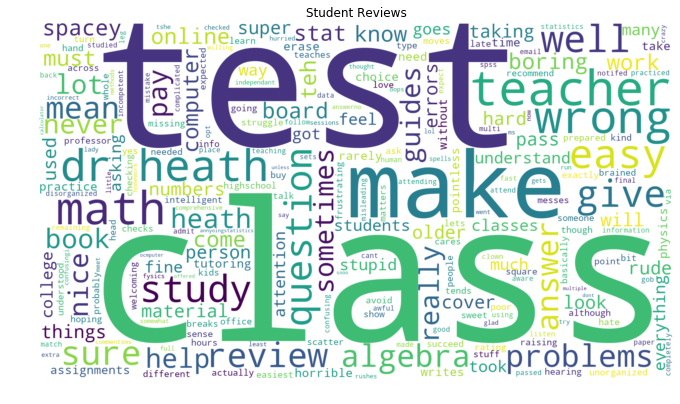

In [69]:
f = plt.figure(figsize = (25,25))
f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('Student Reviews')
plt.axis("off")
plt.show()